<a href="https://colab.research.google.com/github/presannak/ML_Colabs/blob/main/K_means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def initialize_centroids(x,k):
  indices = np.random.choice(len(x), k, replace=False)
  return x[indices]

In [ ]:
def assign_to_clusters(x,centroids):
  distances = np.linalg.norm(x[:,np.newaxis]-centroids,axis=2)
  return np.argmin(distances,axis=1)

In [17]:
def update_centroids(x,labels,k):
  centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
  return centroids

In [18]:
def k_means(x,k,max_iters=100):
  centroids = initialize_centroids(x,k)

  for _ in range(max_iters):
    labels = assign_to_clusters(x,centroids)
    new_centroids = update_centroids(x,labels,k)

    if np.all(centroids == new_centroids):
      break

    centroids = new_centroids
  return labels, centroids

In [19]:
np.random.seed(42)
x = np.concatenate([np.random.normal(loc=i, scale=1, size=(50,2)) for i in range(5)])

In [ ]:
x

In [21]:
k=5
labels, centroids = k_means(x,k)

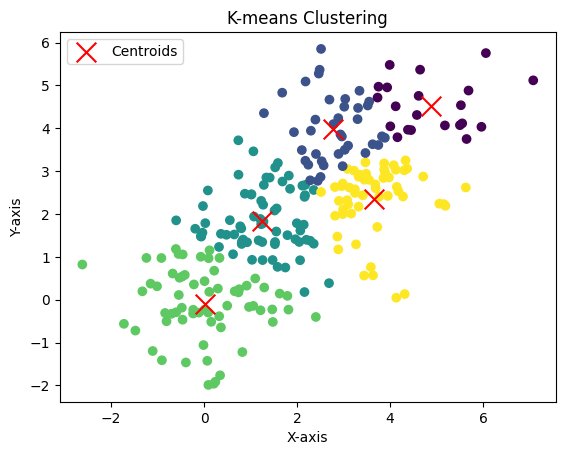

In [24]:
plt.scatter(x[:,0],x[:,1],c=labels,cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=200,c='red',label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()